In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Имеется набор данных со следующими столбцами:

1) Идентификатор документа
2) Идентификатор товара. * Идентификатор товара – уникальный номер единицы товара, находящейся в сервисном центре
3) Операция документа
4) Дата документа
5) Идентификатор филиала, создавшего документ
 
Этот набор данных связан со справочником филиалов. Справочник содержит следующие поля:
1) Идентификатор филиала
2) Наименование филиала
3) Наименование региона филиала
 
Необходимо рассчитать среднее время нахождения товара в сервисном центре:
1) Общая динамика по месяцам
2) Динамика по неделям в разрезе регионов

 Вывести нормативный срок по всей компании. Графически представить динамику отклонения от нормы по каждому региону.

In [2]:
data_df    = pd.read_csv('data/data.csv')
catalog_df = pd.read_csv('data/Справочник.csv')

Обзор данных

In [3]:
data_df.head()

,Идентификатор документа,Идентификатор товара,Вид операции документа,Дата документа,Идентификатор филиалы документа
0,b'\x8f\x03\xf0[gd\xef.P\xb0\\P\xe8f\xb6\x9f',b'\xee\xdf\xa5\xb3\x1f\xe5\x81\x18\x1e\x86j\xe...,Прием товара,2019-01-01,b'\xe1\xdb\xd1\x95\x93\x7f\x17\x7f\xcd\xea\x7f...
1,b'O\x99\x903\x11Zd\x16\x8e\x00\xafM\xb8\x02\xa...,b'a\xad\xa7qJ\x9eW\x15<H\xd5U\x82\xc3-\x04',Прием товара,2019-01-01,b'\xca\xbc\x12\xca\x94?^\x94B\x93\x16\xd8\xf7\...
2,b'\xc3y\xdc\xf9\xc9\xe1\x0cC\x13U\xdby\xac\x97...,b'U\xb8J-\xa7\xae\xe0\xe2\x1a.\x0c\xaf\xfe\x80...,Прием товара,2019-01-01,b']\xe0\xf1p\xff!8x\xb9\xea\xee\xc2P\xcb\xd8\x93'
3,b'9\xf4D`\x00\xf0\x00\xe3\xa8=\xea=N$\xf2\xc9',b'\xf0\x8a\x8f\xe5\xb1\xd4\xd8\xbd\xcc\xb8\x1d...,Прием товара,2019-01-01,b'\x1eF\xdfq\x18\xc5\x8c\x19\xd5\x014\xd7\xef\...
4,b'\x10\x0b?\xd9ehT\x181\xed\xdd}\x1c(\x98`',b'\x10\xf0\x9c\xf6\xd2\x9d\xde\xc08\xde\xa74u\...,Прием товара,2019-01-01,"b'\xfd,{d\x07""\x8c\x0eT\x997\xdcS\x82\xac\xcd'"


In [4]:
catalog_df.head()

,Наименование филиала,Наименование региона филиала,Идентификатор филиала
0,Казань СЦ на Чистопольской,Верхняя Волга,"b'U\x8b\xecN\xb5\xe4\x02+\xcf\x9cT""ivr\n'"
1,Воткинск СЦ,Верхняя Волга,b'\xb5Mv\xe3\x86\xc3\x9a\x0b\x10\xb2\xba\xfa\x...
2,Чистополь СЦ,Верхняя Волга,"b'\xfd,{d\x07""\x8c\x0eT\x997\xdcS\x82\xac\xcd'"
3,Тверь СЦ,Центральный,b'\xe4\x04!)\xa7l\xb0B#=i\xf8\x89\x1a\x8b\x1f'
4,Рославль СЦ,Черноземье,b'\xb85\xa2\xe7\x1b\x8d\xd5\xff\x0bd>\xdcR:\xd...


In [5]:
data_df.shape

(2916597, 5)

In [6]:
catalog_df.shape

(148, 3)

In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2916597 entries, 0 to 2916596
Data columns (total 5 columns):
 #   Column                           Dtype 
---  ------                           ----- 
 0   Идентификатор документа          object
 1   Идентификатор товара             object
 2   Вид операции документа           object
 3   Дата документа                   object
 4   Идентификатор филиалы документа  object
dtypes: object(5)
memory usage: 111.3+ MB


In [8]:
catalog_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Наименование филиала          148 non-null    object
 1   Наименование региона филиала  148 non-null    object
 2   Идентификатор филиала         148 non-null    object
dtypes: object(3)
memory usage: 3.6+ KB


In [9]:
data_df.notna().value_counts()

Идентификатор документа  Идентификатор товара  Вид операции документа  Дата документа  Идентификатор филиалы документа
True                     True                  True                    True            True                               2916597
dtype: int64

In [10]:
catalog_df.notna().value_counts()

Наименование филиала  Наименование региона филиала  Идентификатор филиала
True                  True                          True                     148
dtype: int64

In [11]:
data_df['Вид операции документа'].value_counts()

Прием товара     1499785
Выдача товара    1416812
Name: Вид операции документа, dtype: int64

Подготовка данных

In [12]:
data_df.rename(columns={'Вид операции документа': 'type',
                        'Дата документа': 'date',
                        'Идентификатор филиалы документа': 'office_id'}, inplace=True)

In [13]:
catalog_df.rename(columns={'Идентификатор филиала': 'office_id'}, inplace=True)

In [14]:
# Соединение двух источников данных
main_df = data_df.merge(catalog_df, on='office_id')

In [15]:
# main_df.value_counts()

In [16]:
# Изменения типа данных даты 
main_df['date'] = pd.to_datetime(main_df.date)

In [17]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2916597 entries, 0 to 2916596
Data columns (total 7 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   Идентификатор документа       object        
 1   Идентификатор товара          object        
 2   type                          object        
 3   date                          datetime64[ns]
 4   office_id                     object        
 5   Наименование филиала          object        
 6   Наименование региона филиала  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 178.0+ MB


In [18]:
main_df.head()

,Идентификатор документа,Идентификатор товара,type,date,office_id,Наименование филиала,Наименование региона филиала
0,b'\x8f\x03\xf0[gd\xef.P\xb0\\P\xe8f\xb6\x9f',b'\xee\xdf\xa5\xb3\x1f\xe5\x81\x18\x1e\x86j\xe...,Прием товара,2019-01-01,b'\xe1\xdb\xd1\x95\x93\x7f\x17\x7f\xcd\xea\x7f...,Невинномысск СЦ,Юг
1,b'j\x91\xc07\x88\r\xa8ok\x8f@\xbdu\xe0\xf9*',"b'\xe4\xc6M\x06q,6K\x0c53\xf0\x8d\xaa\x92E'",Прием товара,2019-01-01,b'\xe1\xdb\xd1\x95\x93\x7f\x17\x7f\xcd\xea\x7f...,Невинномысск СЦ,Юг
2,b'\xee\xf5\x9f\x86\x9e<\xae\x1aQ\xaf\x06*\xb1k...,b'\r\xeb\x1c6.\xc4|\x0f\x86\xc4\x0f\x8c\x89\xe...,Прием товара,2019-01-01,b'\xe1\xdb\xd1\x95\x93\x7f\x17\x7f\xcd\xea\x7f...,Невинномысск СЦ,Юг
3,b'\xbaNa\xb8\x05\xc7\xff\xf3@\xc7w\xfbCW\xb5W',b'\x1288\xae\xa6\xaaJ\xd1q\xe3J\xdd#M\xe1\xae',Прием товара,2019-01-01,b'\xe1\xdb\xd1\x95\x93\x7f\x17\x7f\xcd\xea\x7f...,Невинномысск СЦ,Юг
4,"b""\xbf]m\x7f\x83\x8a'\x08\x99/.Y\xc4\xaf\xd8\xed""",b'\xbd\xfdh33xze\x13\x1d\xbd\x119\x96m\xb9',Прием товара,2019-01-01,b'\xe1\xdb\xd1\x95\x93\x7f\x17\x7f\xcd\xea\x7f...,Невинномысск СЦ,Юг


In [19]:
# Деление на временные промежутки и добавление в ДФ колонок
main_df['month'] = main_df['date'].dt.month
main_df['week']  = main_df['date'].dt.isocalendar().week

In [20]:
# Разделение ДФ на начало и конец операции
doc_start = main_df.loc[main_df['type'] == 'Прием товара']
doc_end   = main_df.loc[main_df['type'] == 'Выдача товара']

In [21]:
# Соединение ДФ для дальнейших вычислений времени прибывания товара в СЦ
# main_df.merge(doc_start, on='Идентификатор документа', how='left') \
       # .merge(doc_end, on='Идентификатор документа', how='left')

main_df = pd.merge(doc_start, doc_end, on=['Идентификатор товара', 'office_id'], how='left')

In [22]:
# Подсчет времение прибывания товара в днях
main_df['how_long'] = (main_df['date_y'] - main_df['date_x']).dt.days


In [23]:
# Удаление пустых значений
main_df = main_df.dropna()

In [24]:
main_df.head(3)

,Идентификатор документа_x,Идентификатор товара,type_x,date_x,office_id,Наименование филиала_x,Наименование региона филиала_x,month_x,week_x,Идентификатор документа_y,type_y,date_y,Наименование филиала_y,Наименование региона филиала_y,month_y,week_y,how_long
0,b'\x8f\x03\xf0[gd\xef.P\xb0\\P\xe8f\xb6\x9f',b'\xee\xdf\xa5\xb3\x1f\xe5\x81\x18\x1e\x86j\xe...,Прием товара,2019-01-01,b'\xe1\xdb\xd1\x95\x93\x7f\x17\x7f\xcd\xea\x7f...,Невинномысск СЦ,Юг,1,1,"b""X\x93\xc9\xa6uP\xea\x86\xa1JG\xc5\xf9'\xb6\\""",Выдача товара,2019-01-20,Невинномысск СЦ,Юг,1.0,3,19.0
1,b'j\x91\xc07\x88\r\xa8ok\x8f@\xbdu\xe0\xf9*',"b'\xe4\xc6M\x06q,6K\x0c53\xf0\x8d\xaa\x92E'",Прием товара,2019-01-01,b'\xe1\xdb\xd1\x95\x93\x7f\x17\x7f\xcd\xea\x7f...,Невинномысск СЦ,Юг,1,1,b'Y$ P\x16\xe3\xf4\xeb\xacI\xfcS\xeay\x9b#',Выдача товара,2019-01-24,Невинномысск СЦ,Юг,1.0,4,23.0
2,b'\xee\xf5\x9f\x86\x9e<\xae\x1aQ\xaf\x06*\xb1k...,b'\r\xeb\x1c6.\xc4|\x0f\x86\xc4\x0f\x8c\x89\xe...,Прием товара,2019-01-01,b'\xe1\xdb\xd1\x95\x93\x7f\x17\x7f\xcd\xea\x7f...,Невинномысск СЦ,Юг,1,1,b'Q m\xbd6\xde\xc7o\xd5e\x99\xda*\xe4\xba\xa9',Выдача товара,2019-01-30,Невинномысск СЦ,Юг,1.0,5,29.0


Рассчитать среднее время нахождения товара в сервисном центре

In [25]:
# Нормативный срок?
mean_value = round(main_df.how_long.mean(), 2)
mean_value

20.85

Общая динамика по месяцам

In [26]:
mean_month = main_df.groupby('month_x', as_index=False) \
                    .agg({'how_long' : 'mean'}).round(2) \
                    .rename(columns={'month_x' : 'Месяц', 'how_long' : 'Среднее время (дни)'})
mean_month

,Месяц,Среднее время (дни)
0,1,21.21
1,2,21.25
2,3,21.17
3,4,21.22
4,5,21.22
5,6,21.18
6,7,21.19
7,8,21.24
8,9,21.23
9,10,21.29


Динамика по неделям в разрезе регионов

In [27]:
# Подготовка данных для графика. Среднее значение по неделям в регионах. 
week_region = main_df.groupby(['Наименование региона филиала_x', 'week_x'], as_index=False) \
                     .agg({'how_long' : 'mean'}) \
                     .rename(columns={'Наименование региона филиала_x': 'Регион',
                                     'week_x': 'Неделя',
                                     'how_long': 'Среднее время'})

week_region

,Регион,Неделя,Среднее время
0,Верхняя Волга,1,18.372924
1,Верхняя Волга,2,18.308611
2,Верхняя Волга,3,18.490104
3,Верхняя Волга,4,18.606812
4,Верхняя Волга,5,18.456281
...,...,...,...
515,Юг,48,17.197164
516,Юг,49,15.556810
517,Юг,50,11.886710
518,Юг,51,7.487427


Вывести нормативный срок по всей компании. Графически представить динамику отклонения от нормы по каждому региону

In [28]:
# Подготовка данных для графика. Среднее значение по неделям. 
overall_weeks = main_df.groupby('week_x', as_index=False) \
                       .agg({'how_long' : 'mean'}).round(2) \
                       .rename(columns={'week_x' : 'Неделя',
                                        'how_long' : 'Среднее время'})



In [29]:
# Объединение данных в один набор.
dynamic_region = week_region.merge(overall_weeks, on='Неделя') \
    .rename(columns={'Среднее время_x' : 'Среднее время региона',
                'Среднее время_y' : 'Общее среднее время'})
dynamic_region

,Регион,Неделя,Среднее время региона,Общее среднее время
0,Верхняя Волга,1,18.372924,20.95
1,Восточная Сибирь,1,22.154529,20.95
2,Дальний Восток,1,26.091040,20.95
3,Западная Сибирь,1,22.560319,20.95
4,Приволжский,1,17.715131,20.95
...,...,...,...,...
515,Средняя Волга,52,4.114650,3.86
516,Урал,52,3.868132,3.86
517,Центральный,52,3.896050,3.86
518,Черноземье,52,3.743590,3.86


In [30]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(dynamic_region)

In [31]:
dynamic_region = dynamic_region.rename(columns={'Регион':'region',
                                        'Неделя':'week',
                                        'Среднее время региона':'mediantime',
                                        'Общее среднее время':'alltime'})

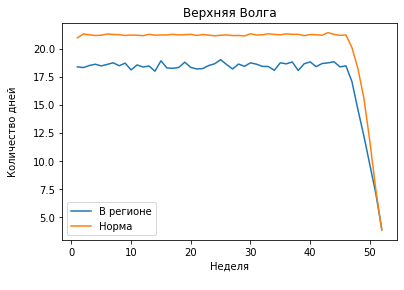

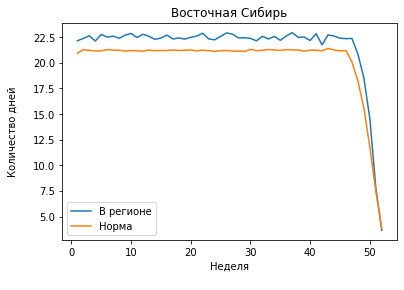

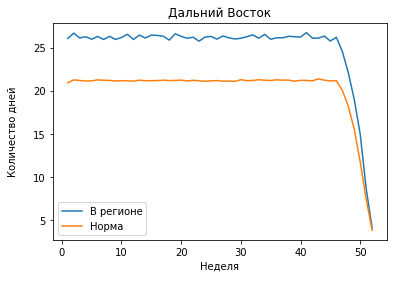

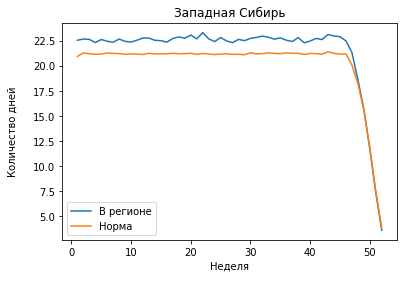

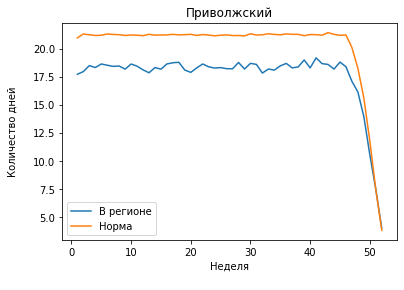

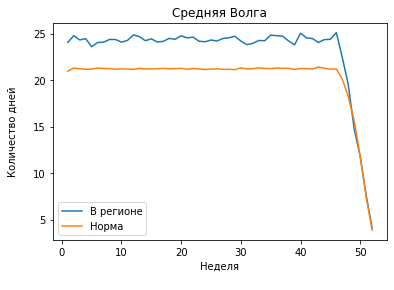

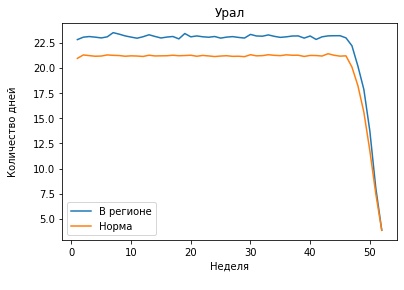

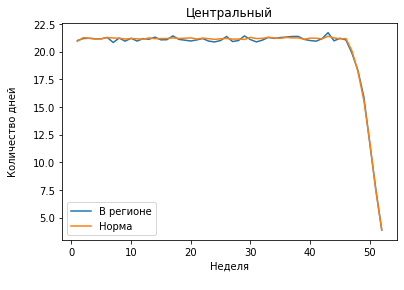

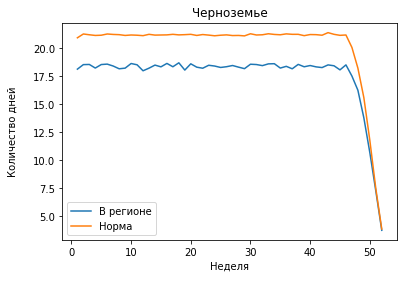

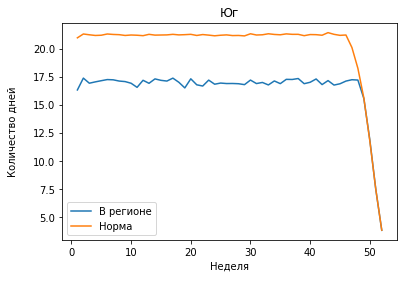

In [32]:
# Графическое представление динамики регионов и среднее время прибывания в СЦ. 
regions = dynamic_region.region.unique()

for i in regions:

    filt = dynamic_region['region'] == i   
    dynamic_region.loc[filt].plot(x='week', y=['mediantime', 'alltime'], label=['В регионе','Норма'])

    plt.xlabel('Неделя\n')
    plt.ylabel('Количество дней\n')
    plt.title(i)
    
    

In [33]:
main_df

,Идентификатор документа_x,Идентификатор товара,type_x,date_x,office_id,Наименование филиала_x,Наименование региона филиала_x,month_x,week_x,Идентификатор документа_y,type_y,date_y,Наименование филиала_y,Наименование региона филиала_y,month_y,week_y,how_long
0,b'\x8f\x03\xf0[gd\xef.P\xb0\\P\xe8f\xb6\x9f',b'\xee\xdf\xa5\xb3\x1f\xe5\x81\x18\x1e\x86j\xe...,Прием товара,2019-01-01,b'\xe1\xdb\xd1\x95\x93\x7f\x17\x7f\xcd\xea\x7f...,Невинномысск СЦ,Юг,1,1,"b""X\x93\xc9\xa6uP\xea\x86\xa1JG\xc5\xf9'\xb6\\""",Выдача товара,2019-01-20,Невинномысск СЦ,Юг,1.0,3,19.0
1,b'j\x91\xc07\x88\r\xa8ok\x8f@\xbdu\xe0\xf9*',"b'\xe4\xc6M\x06q,6K\x0c53\xf0\x8d\xaa\x92E'",Прием товара,2019-01-01,b'\xe1\xdb\xd1\x95\x93\x7f\x17\x7f\xcd\xea\x7f...,Невинномысск СЦ,Юг,1,1,b'Y$ P\x16\xe3\xf4\xeb\xacI\xfcS\xeay\x9b#',Выдача товара,2019-01-24,Невинномысск СЦ,Юг,1.0,4,23.0
2,b'\xee\xf5\x9f\x86\x9e<\xae\x1aQ\xaf\x06*\xb1k...,b'\r\xeb\x1c6.\xc4|\x0f\x86\xc4\x0f\x8c\x89\xe...,Прием товара,2019-01-01,b'\xe1\xdb\xd1\x95\x93\x7f\x17\x7f\xcd\xea\x7f...,Невинномысск СЦ,Юг,1,1,b'Q m\xbd6\xde\xc7o\xd5e\x99\xda*\xe4\xba\xa9',Выдача товара,2019-01-30,Невинномысск СЦ,Юг,1.0,5,29.0
3,b'\xbaNa\xb8\x05\xc7\xff\xf3@\xc7w\xfbCW\xb5W',b'\x1288\xae\xa6\xaaJ\xd1q\xe3J\xdd#M\xe1\xae',Прием товара,2019-01-01,b'\xe1\xdb\xd1\x95\x93\x7f\x17\x7f\xcd\xea\x7f...,Невинномысск СЦ,Юг,1,1,"b',\xc3\xc4q\xe0\x9d i#\x0c\xad\xda\xf3\xfc\x0...",Выдача товара,2019-01-29,Невинномысск СЦ,Юг,1.0,5,28.0
4,"b""\xbf]m\x7f\x83\x8a'\x08\x99/.Y\xc4\xaf\xd8\xed""",b'\xbd\xfdh33xze\x13\x1d\xbd\x119\x96m\xb9',Прием товара,2019-01-01,b'\xe1\xdb\xd1\x95\x93\x7f\x17\x7f\xcd\xea\x7f...,Невинномысск СЦ,Юг,1,1,b';\x1f\xf3\xa78\xe37K\xc0\xd7/\x9f\x1f\x0cl\x1b',Выдача товара,2019-01-19,Невинномысск СЦ,Юг,1.0,3,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1499342,b'\xa0\xa4\xca\xba\x17lji\xde(JdI\xb5\xdaR',b'\x11\xd6\x0b\x1c\xcc\xe1\xc9/\x92u\xcbhd!\xeb1',Прием товара,2019-12-15,b'y:\xc7\x0bQ\xeb\xe9[?\xb9\xbe\xac>\x08H\x10',Сергиев-Посад СЦ,Центральный,12,50,"b'\xeb\xb4\xc3~;\x9ee,\x18\x92\x8e]\xa2\x1b\xd...",Выдача товара,2019-12-30,Сергиев-Посад СЦ,Центральный,12.0,1,15.0
1499345,b'\xe5\xe7\x01\xe2u?\xce\x9c\xda\x0ebB\x17`/!',b'E\xb9\x1c\xf5\xaf\xd4?\xc0\x97\xc5\x13\r\x1b...,Прием товара,2019-12-15,b'y:\xc7\x0bQ\xeb\xe9[?\xb9\xbe\xac>\x08H\x10',Сергиев-Посад СЦ,Центральный,12,50,b'D\xc8\xbb\xb97\x1e\x8cV\xb0\xdb\r\x9f\xa5\xc...,Выдача товара,2019-12-30,Сергиев-Посад СЦ,Центральный,12.0,1,15.0
1499348,b'\xbd\xb8h\x14\xc2\xbf\x9e2\xef\x1b\xbdM\xa5n...,b'\xc9\xfb\xc6\xf2(\x84\x14/\xc7\x8d\x08r\xf1L...,Прием товара,2019-12-15,b'y:\xc7\x0bQ\xeb\xe9[?\xb9\xbe\xac>\x08H\x10',Сергиев-Посад СЦ,Центральный,12,50,b'y\xbb\xa1Y\xe5\x928\xff\xcb\xc0\x9a\xe0\x86F...,Выдача товара,2019-12-30,Сергиев-Посад СЦ,Центральный,12.0,1,15.0
1499358,b'\x1b\xf1\xc6i\xc6\xf8\xbcN\xab\xc3A\xe0\x1b\...,b'\xa5\x8e&0\xabg\x04\xfb\xc6\xb0\xd2{v\xd5Rd',Прием товара,2019-12-16,b'y:\xc7\x0bQ\xeb\xe9[?\xb9\xbe\xac>\x08H\x10',Сергиев-Посад СЦ,Центральный,12,51,b'\x15\x04\xf0\xcb|^M\xdc\x8d\xc7\xf3\xab\t6\x...,Выдача товара,2020-01-01,Сергиев-Посад СЦ,Центральный,1.0,1,16.0


In [34]:
a = pd.to_datetime('2019-02-20')
b = pd.to_datetime('2019-06-01')
c = main_df[(main_df['date_y'] >= a) & (main_df['date_y'] <= b)]
c

,Идентификатор документа_x,Идентификатор товара,type_x,date_x,office_id,Наименование филиала_x,Наименование региона филиала_x,month_x,week_x,Идентификатор документа_y,type_y,date_y,Наименование филиала_y,Наименование региона филиала_y,month_y,week_y,how_long
565,b'_%\xc7\xedv\xf5A\x00c\xb5\x9f\n\xfa\xe4\xdfg',b's\xe9\xb8\xa6\x14\xa6\x0f\x8e\x9dy<\xb7\xeb\...,Прием товара,2019-01-21,b'\xe1\xdb\xd1\x95\x93\x7f\x17\x7f\xcd\xea\x7f...,Невинномысск СЦ,Юг,1,4,b'v\xf3.(\xf91\xef\xceA\x98\xb0\x9a\xd1\xe3\x0...,Выдача товара,2019-02-20,Невинномысск СЦ,Юг,2.0,8,30.0
585,b'UA\xc5\xc3]@\xab\xf8\xfb\xe4\xec\xbf\x97\xe9...,b'r\x02\x03}]r\xad\x8e\x82\x13\xb1\x04~}2H',Прием товара,2019-01-22,b'\xe1\xdb\xd1\x95\x93\x7f\x17\x7f\xcd\xea\x7f...,Невинномысск СЦ,Юг,1,4,b'\xa7\xfac:\x15\x15V\x1f\xa0\xb0\n\x87<L\x0e\...,Выдача товара,2019-02-21,Невинномысск СЦ,Юг,2.0,8,30.0
600,b'0\xaa\xf7$\xfc\xba@q\x81\\\x18\x0b\xcd\xdaWU',"b'2v""\xf5\x06\x1e\x1e#\xe6)\xf0\xe1\x1es\xf4\xde'",Прием товара,2019-01-22,b'\xe1\xdb\xd1\x95\x93\x7f\x17\x7f\xcd\xea\x7f...,Невинномысск СЦ,Юг,1,4,b'\x9f\xeba!\xafC\xbc)&U\x15\xf2\xd7\xb6\xcd(',Выдача товара,2019-02-21,Невинномысск СЦ,Юг,2.0,8,30.0
615,b'H\x93\xacv9\x17\xa9\xfe1z\xb7\x9cs\x0f\x1e\x12',b'\x9e\x0e\r\xe7\xfe\x12gD\xb3\x81\xbb/\xa51\x...,Прием товара,2019-01-23,b'\xe1\xdb\xd1\x95\x93\x7f\x17\x7f\xcd\xea\x7f...,Невинномысск СЦ,Юг,1,4,"b""\x1f\xc1\xe1@\xa7+\x7f\xaa\x981k\x05h'\x915""",Выдача товара,2019-02-20,Невинномысск СЦ,Юг,2.0,8,28.0
616,b'\xbb\xd5\xa4;#\xe9\x07\xe0\x15H\xf2\xeb\x16\...,b'S\x17<\xce|\x16\x81\x9a\x03\xe2j)\x88c\xaf\x18',Прием товара,2019-01-23,b'\xe1\xdb\xd1\x95\x93\x7f\x17\x7f\xcd\xea\x7f...,Невинномысск СЦ,Юг,1,4,b'\xf7\xcfP\xa1V\x18\x0c{&{\x89\x8a\x19\xe5\xf6w',Выдача товара,2019-02-22,Невинномысск СЦ,Юг,2.0,8,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493491,b'\x99<\x1dh \x014N\xaa\xb6+e\x1d\xb6\x93\x80',b'^DP\xc31\x90\x9cl\xb4\xe6}\x9a\xef\xd1\x19L',Прием товара,2019-05-15,b'y:\xc7\x0bQ\xeb\xe9[?\xb9\xbe\xac>\x08H\x10',Сергиев-Посад СЦ,Центральный,5,20,b'\\\xa8d_\xd7\x8c\xcf\xb7\xeb\xbe\xd4\xc5\xf9...,Выдача товара,2019-05-30,Сергиев-Посад СЦ,Центральный,5.0,22,15.0
1493493,b'x\x06\xeb\x18a/Y\xd7\xfc\xd4:z%\xa5\xde{',"b""`\xc1i\xec35\xb8\x8f\x10\xb0\x1a$='\xa8\x81""",Прием товара,2019-05-15,b'y:\xc7\x0bQ\xeb\xe9[?\xb9\xbe\xac>\x08H\x10',Сергиев-Посад СЦ,Центральный,5,20,b'\xb0\xcds\xc1\xf70\x82F\x86\xea\xd3\xb3U\xf3...,Выдача товара,2019-05-30,Сергиев-Посад СЦ,Центральный,5.0,22,15.0
1493494,b'\xc1\xb2\xdfA!Kl\xbc\xdd\xe8\xd5\xdc\xaa\x0c...,b'\xc0\xcc\x93\xf0\xc3b\xd2\xdeu1y\xba\x02\xc8...,Прием товара,2019-05-15,b'y:\xc7\x0bQ\xeb\xe9[?\xb9\xbe\xac>\x08H\x10',Сергиев-Посад СЦ,Центральный,5,20,b'\xadu\xc3\xeb\xe9t\xc1\xce\x88\xee\xc6\xfc\x...,Выдача товара,2019-06-01,Сергиев-Посад СЦ,Центральный,6.0,22,17.0
1493502,b'Q\xc0\xf2\x9a\x94\xc7HT\xafU\x90\x99\x87V\x9...,b'-\xa19\xad^\xe5\xaf\x17\xf1Ha\xf2\x8bR\xed`',Прием товара,2019-05-16,b'y:\xc7\x0bQ\xeb\xe9[?\xb9\xbe\xac>\x08H\x10',Сергиев-Посад СЦ,Центральный,5,20,b'\x1e\xfb\r\xd8\x9c:\xe1\x9a+\xdc\xa2\xa5M\x9...,Выдача товара,2019-06-01,Сергиев-Посад СЦ,Центральный,6.0,22,16.0
